# Examples

In [2]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [4]:
%load_ext autoreload
%autoreload 2

import LoadData
import MCScomposites
import HelperFunctions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [24]:
workdir = "/Users/hannah/Documents/Studium/Masterarbeit/data"

In [ ]:
# MCSonsetDetection.sh
df_all = LoadData.loadColdPools(f"{workdir}/coldpools", date_columns=["DCS_Init", "DCS_End", "tmax", "tmin", "DCS_Time_Closest", "Time_Surface_Max_235K"])
mduration = MCScomposites.median_coldpool_duration(df_all)
mduration

v3_2005coldpools.csv
v3_2002coldpools.csv
v3_2017coldpools.csv
v3_2010coldpools.csv
v3_2011coldpools.csv
v3_2016coldpools.csv
v3_2003coldpools.csv
v3_2004coldpools.csv
v3_2009coldpools.csv
v3_2008coldpools.csv
v3_1999coldpools.csv
v3_2018coldpools.csv
v3_1998coldpools.csv
v3_2014coldpools.csv
v3_2013coldpools.csv
v3_2006coldpools.csv
v3_2001coldpools.csv
v3_2000coldpools.csv
v3_2007coldpools.csv
v3_2012coldpools.csv
v3_2015coldpools.csv


/Users/hannah/Documents/Paper/Calms-and-Storms/LoadData.py:89: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_year = pd.read_csv(


Timedelta('0 days 01:50:00')

In [ ]:
# python LoadData.py -p data/PIRATA -o data/Observations/data_met_1998-2018.nc
data = xr.open_dataset(
    f"{workdir}/Observations/data_met_1998-2018.nc"
    )
# python MCScomposites.py -p data/PIRATA -c data/coldpools -o data/Observations/data_met_rescaled_1998-2018_>1K.nc
data_rescaled = xr.open_dataset(
    f"{workdir}/Observations/data_met_rescaled_1998-2018_>1K.nc"
    )

# python doldrums.py data/PIRATA -o data/Observations/datLWSE_1998-2018_lowpass.nc
datLWSE = xr.open_dataset(
    f"{workdir}/Observations/datLWSE_1998-2018_lowpass.nc"
    )
# datLWSE_rescaled = MCScomposites.composites(datLWSE, df_all)
# datLWSE_rescaled.to_netcdf("data/Observations/LWSEDataBuoys_rescaled_1998-2018_>1K_48h.nc")
datLWSE_rescaled = xr.load_dataset(
    f"{workdir}/Observations/LWSEDataBuoys_rescaled_1998-2018_>1K_48h.nc"
    ).sel(duration_thld=6)

## Cold pool composite

In [10]:
def create_CP_axis(ax, da_rescaled, color, label, ylim):
    da = da_rescaled.mean("DCS")
    da.plot(ax=ax, x='hours', color=color)
    se = HelperFunctions.get_StandardError(da_rescaled)
    (da+se).plot(ax=ax, x='hours', color=color, linestyle=':')
    (da-se).plot(ax=ax, x='hours', color=color, linestyle=':')
    # ax.fill_between(data_rescaled.hours, da+se, da-se, alpha=0.5)
    ax.set_ylabel(label, color=color)
    ax.set_ylim(ylim)
    ax.tick_params(axis='y', labelcolor=color)

/Users/hannah/miniconda3/envs/MasterarbeitEnv.txt/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/hannah/miniconda3/envs/MasterarbeitEnv.txt/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/hannah/miniconda3/envs/MasterarbeitEnv.txt/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/hannah/miniconda3/envs/MasterarbeitEnv.txt/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


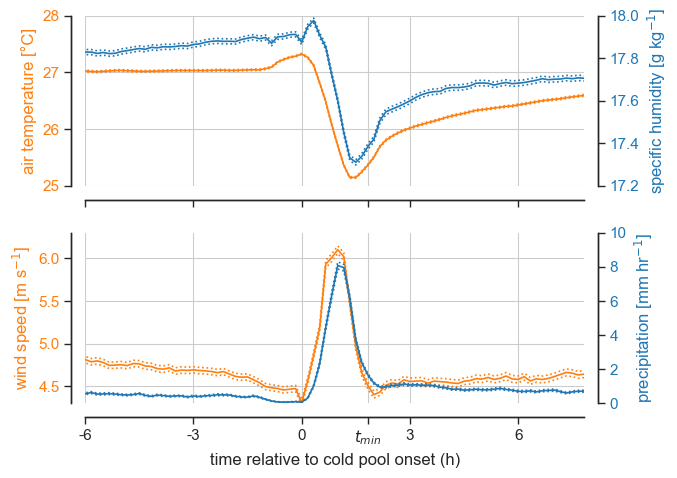

In [11]:
sns.set_theme()
sns.set_context("paper", font_scale=1.25)
sns.set_style("ticks")

title = ""
plt.rcParams.update({'font.size': 14})
fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True, figsize=(7, 5))
# matplotlib.rcParams.update({'font.size': 22})

# --- First panel: Air Temperature and Specific Humidity ---
create_CP_axis(ax1, data_rescaled.AT_21, "tab:orange", "air temperature [°C]", (25, 28))
ax2 = ax1.twinx()
create_CP_axis(ax2, data_rescaled.SH, "tab:blue", 'specific humidity [g kg$^{-1}$]', (17.2, 18))

xticks = [-6, -3, 0, mduration / np.timedelta64(1, "h"), 3, 6]
labels = [-6, -3, 0, "$t_{min}$", 3, 6]

ax1.set_xticks(xticks, labels)
ax1.set_xticklabels(labels)
ax1.set_title(title)
ax1.set_xlim(-6, mduration / np.timedelta64(1, "h") + 6)
ax1.set_xlabel("")  # Remove xlabel from top plot

# --- Second panel: Wind speed and precipitation ---
create_CP_axis(ax3, data_rescaled.WS_401, "tab:orange", r"wind speed [m s$^{-1}$]", (4.3, 6.3))
ax4 = ax3.twinx()
create_CP_axis(ax4, data_rescaled.RN_485, "tab:blue", r'precipitation [mm hr$^{-1}$]', (0, 10))

ax3.set_xticks(xticks, labels)
ax3.set_xticklabels(labels)
ax3.set_xlabel("time relative to cold pool onset (h)")
ax3.set_xlim(-6, mduration / np.timedelta64(1, "h") + 6)
ax3.set_title("")  # No title for lower plot

ax3.grid()
ax1.grid()

sns.despine(offset=10, trim=False, left=False, right=False)

plt.tight_layout()

## Composite of low wind speed event occurence rate 

In [12]:
def get_LWSErate_composite(da_rescaled, ax, color="black", label="all MCS", se=True, alpha=1):
    da_mean = da_rescaled.mean('DCS')
    da_mean.plot(ax=ax, x='hours', label=label, color=color, drawstyle="steps-post", alpha=alpha)

    if se:
        se = HelperFunctions.get_StandardError(da_rescaled)
        # se = stats.sem(da_rescaled)

        (da_mean+se).plot(ax=ax, x='hours', color=color, linestyle=':', alpha=0.6, drawstyle="steps-post")
        (da_mean-se).plot(ax=ax, x='hours', color=color, linestyle=':', alpha=0.6, drawstyle="steps-post")

In [13]:
def create_xaxis(ax, interval, mduration):
    xticks = [-12, -6, 0, mduration / np.timedelta64(1, "h"), 6, 12]
    labels = [-12, -6, 0,  "$t_{min}$", 6, 12]

    ax.set_xticklabels(labels)
    ax.set_xticks(xticks, labels)

    ax.set_xlabel("Time relative to cold pool onset (h)")
    ax.margins(x=0)
    sns.despine(offset=10)
    # ax.set_xlim((-interval/ np.timedelta64(1, 'h'), (mduration + interval)/ np.timedelta64(1, 'h')))

In [14]:
buoys = [
    (4, -38),
    (8, -38),
    (12, -38),
    (0, -23),
    (4, -23),
    (12, -23),
]

In [15]:
mean_week = HelperFunctions.LWSEmean_week(datLWSE)

/Users/hannah/miniconda3/envs/MasterarbeitEnv.txt/lib/python3.13/site-packages/xarray/core/dataset.py:228: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  data = getattr(ref_var.dt, var_name).data


In [16]:
thld = 6
interval = np.timedelta64(18, 'h')
da_rescaled = (datLWSE_rescaled.field
      .sel(time_rescaled=slice(-np.timedelta64(13, 'h'), np.timedelta64(17, 'h')))
)

In [17]:
seasonal_avg = HelperFunctions.get_seasonal_avg(da_rescaled, df_all, mean_week, buoys)
print(seasonal_avg)

0.1343978655101919


Seasonal average: 0.1343978655101919


/var/folders/r3/p1kbghb53sn4fswzyc51wpyr0000gn/T/ipykernel_57670/346782713.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


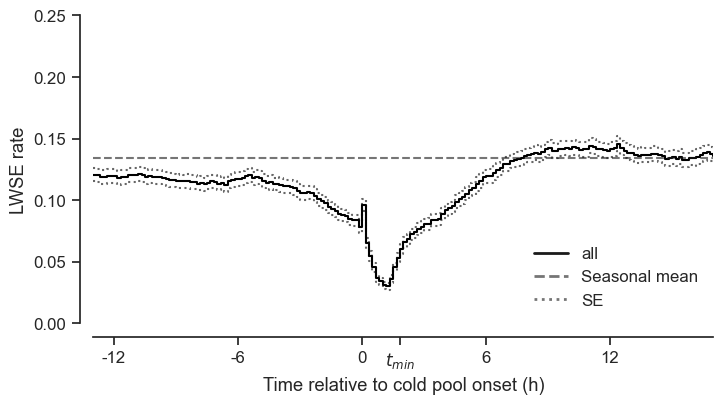

In [18]:
sns.plotting_context("paper")
sns.set( font_scale=1.1)
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(8, 4))

get_LWSErate_composite(da_rescaled, ax=ax)

ax.axhline(seasonal_avg, linestyle="--", color="k", alpha=0.6, label="seasonal avg")
print("Seasonal average:", seasonal_avg)
# ax.axhline(datLWSE.field.mean(), linestyle="-", color="k", alpha=0.6, label="overall avg")

create_xaxis(ax, interval, mduration)

ax.set_ylabel("LWSE rate")
ax.set_ylim((0,0.25))
# ax.set_ylim((0,0.01))

ax.set_title("")
custom_lines = [
                Line2D([0], [0], color="k", lw=2),
                Line2D([0], [0], color="k", lw=2, alpha=0.6, linestyle="--"),
                Line2D([0], [0], color="k", alpha=0.6, lw=2, linestyle=':')
                ]

ax.legend(custom_lines, ['all', 'Seasonal mean', 'SE'], loc="lower right", frameon=False)

## Low wind speed event composites

In [25]:
df_LWSE = pd.read_csv(f"{workdir}/Observations/LWSE/df_LWSE.csv", parse_dates=["tmax", "tmin"])
mLWSEduration = MCScomposites.median_coldpool_duration(df_LWSE).round("min")

In [26]:
# data_LWSE = MCScomposites.composites(data, df_LWSE)
data_LWSE = xr.load_dataset(
    f"{workdir}/Observations/LWSE/dataMet_toLWSE_rescaled_1998-2018_6h.nc"
    )

In [27]:
buoys = [
    (4, -38),
    (8, -38),
    (12, -38),
    (0, -23),
    (4, -23),
    (12, -23),
]
da_LWSE_mean = []
for lat_b, lon_b in buoys:
    LWSE_buoy = df_LWSE[(df_LWSE.lat == lat_b) & (df_LWSE.lon == lon_b)].index.values
    print(len(LWSE_buoy), "low wind speed events were detected at buoy", lat_b, "°N", lon_b, "°E")
    da_mean_buoy = data_LWSE.isel(DCS=LWSE_buoy).mean("DCS").copy()
    da_mean_buoy = da_mean_buoy.expand_dims({'lat': [lat_b], 'lon': [lon_b]})
    da_LWSE_mean.append(da_mean_buoy)

data_LWSE_mean = xr.merge(da_LWSE_mean)

data_mean_week = data.groupby("time.weekofyear").mean()
data_seasonal_mean = (data_mean_week * mean_week).sum("weekofyear") / mean_week.sum("weekofyear")
data_seasonal_mean["lon"] = data_seasonal_mean.lon - 360
data_seasonal_mean = data_seasonal_mean.expand_dims({'time_rescaled': data_LWSE_mean.time_rescaled})
data_seasonal_mean = data_seasonal_mean.rename_vars({'AT_21': 'AT_21_mean', 'RH_910': 'RH_910_mean', 'SH': 'SH_mean', 'RN_485': 'RN_485_mean', 'WS_401': 'WS_401_mean'})
data_LWSE_mean = xr.merge([data_LWSE_mean, data_seasonal_mean])
data_LWSE_mean

388 low wind speed events were detected at buoy 4 °N -38 °E
554 low wind speed events were detected at buoy 8 °N -38 °E
409 low wind speed events were detected at buoy 12 °N -38 °E
619 low wind speed events were detected at buoy 0 °N -23 °E
722 low wind speed events were detected at buoy 4 °N -23 °E
279 low wind speed events were detected at buoy 12 °N -23 °E


/Users/hannah/miniconda3/envs/MasterarbeitEnv.txt/lib/python3.13/site-packages/xarray/core/dataset.py:228: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  data = getattr(ref_var.dt, var_name).data


<xarray.Dataset> Size: 101kB
Dimensions:        (time_rescaled: 203, lat: 4, lon: 2)
Coordinates:
  * time_rescaled  (time_rescaled) timedelta64[ns] 2kB -1 days +12:00:00 ... ...
  * lat            (lat) int64 32B 0 4 8 12
  * lon            (lon) int64 16B -38 -23
    hours          (time_rescaled) float64 2kB -12.0 -11.83 ... 21.5 21.67
    duration_thld  int64 8B 6
Data variables:
    AT_21          (lat, lon, time_rescaled) float32 6kB nan nan ... 27.04 nan
    RH_910         (lat, lon, time_rescaled) float32 6kB nan nan ... 84.52 nan
    SH             (lat, lon, time_rescaled) float32 6kB nan nan ... 17.82 nan
    RN_485         (lat, lon, time_rescaled) float32 6kB nan nan ... 0.0892 nan
    WS_401         (lat, lon, time_rescaled) float32 6kB nan nan ... 3.721 nan
    AT_21_mean     (time_rescaled, lat, lon) float64 13kB nan 27.16 ... 26.92
    RH_910_mean    (time_rescaled, lat, lon) float64 13kB nan 85.37 ... 84.44
    SH_mean        (time_rescaled, lat, lon) float64 13kB nan 18.09 ... 17.66
    RN_485_mean    (time_rescaled, lat, lon) float64 13kB nan 0.1775 ... 0.2039
    WS_401_mean    (time_rescaled, lat, lon) float64 13kB nan 3.925 ... 4.404

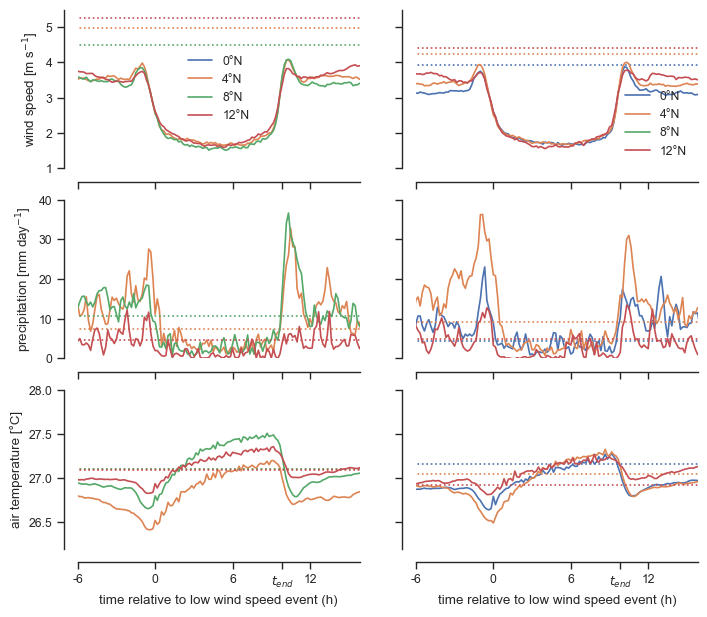

In [28]:
sns.set_context("paper")
sns.set_style("ticks")

figsize = (8, 7)
fig, axes = plt.subplots(3, 2, figsize=figsize, sharex=True)
axes = axes.ravel()

# create color palette
lats = list(data_LWSE_mean.lat.values) 
# pick or build a palette with same length
pal = sns.color_palette(n_colors=len(lats))
color_map = dict(zip(lats, pal))

for i, ax in enumerate(axes):
    if i in [0, 1]:
        lon = -38 if i == 0 else -23
        for lat in lats:
            data_LWSE_mean.WS_401.sel(lat=lat, lon=lon).plot(ax=ax, x="hours", color=color_map[lat], label=f"{lat}°N")
            data_LWSE_mean.WS_401_mean.sel(lat=lat, lon=lon).plot(ax=ax, x="hours", color=color_map[lat], label="", linestyle='dotted')
        ax.set_xlabel("")
        ax.set_ylabel(r"wind speed [m s$^{-1}$]")
        ax.set_ylim((1, 5.5))
        ax.legend(frameon=False)
    elif i in [2, 3]:
        lon = -38 if i == 2 else -23

        rain = data_LWSE_mean.RN_485 * 24
        rain_mean = data_LWSE_mean.RN_485_mean * 24
        for lat in lats:
            rain.sel(lat=lat, lon=lon).plot(ax=ax, x="hours", color=color_map[lat], label="")
            rain_mean.sel(lat=lat, lon=lon).plot(ax=ax, x="hours", color=color_map[lat], linestyle='dotted')
        ax.set_xlabel("")
        ax.set_ylabel(r"precipitation [mm day$^{-1}$]")
        ax.set_ylim((0, 40))
        # ax.get_legend().remove()
    elif i in [4, 5]:
        lon = -38 if i == 4 else -23
        for lat in lats:
            data_LWSE_mean.AT_21.sel(lat=lat, lon=lon).plot(ax=ax, x="hours", color=color_map[lat], label="")
            data_LWSE_mean.AT_21_mean.sel(lat=lat, lon=lon).plot(ax=ax, x="hours", color=color_map[lat], linestyle='dotted')
        ax.set_ylabel("air temperature [°C]")
        ax.set_ylim((26.2, 28.0))
        # ax.get_legend().remove()
    ax.set_title("")

xticks = [-6, 0, mLWSEduration / np.timedelta64(1, "h"), 6, 12]
labels = [ -6, 0, "$t_{end}$", 6, 12]
for ax in axes[-2:]:
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_xlim(-6, (mLWSEduration) / np.timedelta64(1, "h") + 6)
    ax.set_xlabel("time relative to low wind speed event (h)")

for ax in axes[1::2]:
    ax.set_ylabel("")
    ax.set_yticklabels([])

sns.despine(offset=10)
